In [1]:
# create a streamlit web app to deploy the model
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Importing the libraries needed
import torch
import urllib.request
from PIL import Image
from transformers import pipeline




In [ ]:
# create a image upload function using streamlit in order to use the model



In [3]:
# Determining the file URL
url = 'some url'

# Opening the image using PIL
img = Image.open(urllib.request.urlretrieve(url)[0])

# Loading the model and preprocessor using Pipeline
pipe = pipeline("image-classification", model="dennisjooo/Birds-Classifier-EfficientNetB2")

# Running the inference
result = pipe(img)[0]

# Printing the result label
print(result['label'])

ValueError: unknown url type: 'some url'

In [111]:
# create a function to convert the "ALEXANDRINE PARAKEET", to "Alexandrine_parakeet" sytle

def convert_label(label):
    return label.replace(" ", "_").lower()

In [113]:
convert_label('GOLD WING WARBLER')

'gold_wing_warbler'

In [119]:
import requests

# Define the endpoint
endpoint = "https://en.wikipedia.org/w/api.php"

# Define the parameters
params = {
    "action": "query",
    "format": "json",
    
    "titles": "gold-winged warbler",
    "prop": "extracts",
    "exintro": True,
    "explaintext": True
}

# Make the request
response = requests.get(endpoint, params=params)

# Parse the response
data = response.json()

# Extract the page content
page = next(iter(data['query']['pages'].values()))
extract = page.get('extract', 'No extract available')

print(extract)

No extract available


In [13]:
import geocoder



In [14]:
import geocoder

# Get the current location based on IP
g = geocoder.ip('me')

# Print coordinates
print(g.latlng)

[-33.8678, 151.2073]


In [28]:
lat, lon = g.latlng
import geemap
Map = geemap.Map(center=(lat, lon), zoom=15)
Map

Map(center=[-33.8678, 151.2073], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [3]:
# pip install streamlit-geolocation
from streamlit_geolocation import streamlit_geolocation
location = streamlit_geolocation()
st.write(location)

2025-02-02 14:37:18.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 14:37:18.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 14:37:18.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 14:37:18.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 14:37:18.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 14:37:18.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
import streamlit as st
from bokeh.models.widgets import Button
from bokeh.models import CustomJS
from streamlit_bokeh_events import streamlit_bokeh_events

loc_button = Button(label="Get Location")
loc_button.js_on_event("button_click", CustomJS(code="""
    navigator.geolocation.getCurrentPosition(
        (loc) => {
            document.dispatchEvent(new CustomEvent("GET_LOCATION", {detail: {lat: loc.coords.latitude, lon: loc.coords.longitude}}))
        }
    )
    """))
result = streamlit_bokeh_events(
    loc_button,
    events="GET_LOCATION",
    key="get_location",
    refresh_on_update=False,
    override_height=75,
    debounce_time=0)

In [23]:
import streamlit_js_eval
st.write(f"Screen width is {streamlit_js_eval(js_expressions='screen.width', key = 'SCR')}")

2025-02-01 00:44:29.865 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


TypeError: 'module' object is not callable

In [25]:
# Returns user's location after asking for permission when the user clicks the generated link with the given text
from streamlit_geolocation import streamlit_geolocation

location = streamlit_geolocation()
print(location)

2025-02-01 00:45:35.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 00:45:35.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 00:45:35.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 00:45:35.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


{'latitude': None, 'longitude': None, 'altitude': None, 'accuracy': None, 'altitudeAccuracy': None, 'heading': None, 'speed': None}


In [27]:
# importing geopy library
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")
 
# entering the location name
getLoc = loc.geocode("christchurch")
 
# printing address
print(getLoc.address)
 
# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

Christchurch, Christchurch City, Canterbury, New Zealand / Aotearoa
Latitude =  -43.530955 

Longitude =  172.6364343


In [2]:
from streamlit_folium import st_folium

2025-02-01 01:58:56.748 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [1]:
# Install the streamlit_folium package
%pip install streamlit_folium

from streamlit_folium import st_folium

ModuleNotFoundError: No module named 'streamlit_folium'

In [2]:
import requests

# Replace these with actual latitude and longitude values
lat = -43.50
lng = 172.58

url = f"https://api.ebird.org/v2/ref/hotspot/geo?lat={lat}&lng={lng}"

payload = {}
headers = {
    'X-eBirdApiToken': 'aqf69iukjcqs'  # Replace 'YOUR_API_KEY' with your actual eBird API key
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

L4001220,NZ,NZ-CAN,NZ-CAN-059,-43.2817824,172.5454009,Ashley River--Dunlops Road access,2024-09-21 11:24,42
L1023141,NZ,NZ-CAN,NZ-CAN-059,-43.2803547,172.5793362,Ashley River--Rossitors Rd,2024-12-27 14:35,38
L5126261,NZ,NZ-CAN,NZ-CAN-059,-43.2813294,172.6356786,Ashley River--Smarts Road,2025-01-31 16:02,46
L523081,NZ,NZ-CAN,NZ-CAN-060,-43.5204229,172.7277374,Avon River mudflats @ Kibblewhite St,2024-12-29 20:27,48
L1257339,NZ,NZ-CAN,NZ-CAN-060,-43.5001318,172.685667,Avon River--New Brighton Rd,2024-12-27 20:43,37
L8597161,NZ,NZ-CAN,NZ-CAN-060,-43.5381682,172.7374619,Avon-Heathcote Estuary Ihutai--Ebbtide Street area,2025-02-03 19:30,46
L15352477,NZ,NZ-CAN,NZ-CAN-060,-43.5307182,172.7236054,Avon-Heathcote Estuary Ihutai--Eel Trap Bay,2024-12-29 20:00,37
L9979404,NZ,NZ-CAN,NZ-CAN-060,-43.558405,172.708853,Avon-Heathcote Estuary Ihutai--Heathcote River Bridge,2025-01-07 08:59,43
L558750,NZ,NZ-CAN,NZ-CAN-060,-43.5541622,172.7035975,Avon-Heathcote Estuary Ihutai--Humphreys Drive Foreshore,

In [12]:
print(response.text)

L4001220,NZ,NZ-CAN,NZ-CAN-059,-43.2817824,172.5454009,Ashley River--Dunlops Road access,2024-09-21 11:24,42
L1023141,NZ,NZ-CAN,NZ-CAN-059,-43.2803547,172.5793362,Ashley River--Rossitors Rd,2024-12-27 14:35,38
L5126261,NZ,NZ-CAN,NZ-CAN-059,-43.2813294,172.6356786,Ashley River--Smarts Road,2025-01-31 16:02,46
L523081,NZ,NZ-CAN,NZ-CAN-060,-43.5204229,172.7277374,Avon River mudflats @ Kibblewhite St,2024-12-29 20:27,48
L1257339,NZ,NZ-CAN,NZ-CAN-060,-43.5001318,172.685667,Avon River--New Brighton Rd,2024-12-27 20:43,37
L8597161,NZ,NZ-CAN,NZ-CAN-060,-43.5381682,172.7374619,Avon-Heathcote Estuary Ihutai--Ebbtide Street area,2025-01-10 21:15,46
L15352477,NZ,NZ-CAN,NZ-CAN-060,-43.5307182,172.7236054,Avon-Heathcote Estuary Ihutai--Eel Trap Bay,2024-12-29 20:00,37
L9979404,NZ,NZ-CAN,NZ-CAN-060,-43.558405,172.708853,Avon-Heathcote Estuary Ihutai--Heathcote River Bridge,2025-01-07 08:59,43
L558750,NZ,NZ-CAN,NZ-CAN-060,-43.5541622,172.7035975,Avon-Heathcote Estuary Ihutai--Humphreys Drive Foreshore,

In [14]:
# Example data
#data = "L4001220,NZ,NZ-CAN,NZ-CAN-059,-43.2817824,172.5454009,Ashley River--Dunlops Road access,2024-09-21 11:24,42"
data = response.text
# Split the string by commas
data_list = data.split(',')

# Extract the latitude and longitude
latitude = float(data_list[4])
longitude = float(data_list[5])

print(f"Latitude: {latitude}, Longitude: {longitude}")

Latitude: -43.2817824, Longitude: 172.5454009


In [21]:
list(response)[1]

b'Z-CAN-059,-43.2803547,172.5793362,Ashley River--Rossitors Rd,2024-12-27 14:35,38\nL5126261,NZ,NZ-CAN,NZ-CAN-059,-43.2813294,172.6'

In [22]:
list(response)[2]

b'356786,Ashley River--Smarts Road,2025-01-31 16:02,46\nL523081,NZ,NZ-CAN,NZ-CAN-060,-43.5204229,172.7277374,Avon River mudflats @ '

In [37]:
# Split the data into lines
lines = data.strip().split('\n')

# Extract coordinates from each line
coordinates = []
for line in lines:
    parts = line.split(',')
    latitude = float(parts[4])
    longitude = float(parts[5])
    coordinates.append((latitude, longitude))

# Print the coordinates
for lat, lon in coordinates:
    print(f"Latitude: {lat}, Longitude: {lon}")

Latitude: -43.2817824, Longitude: 172.5454009
Latitude: -43.2803547, Longitude: 172.5793362
Latitude: -43.2813294, Longitude: 172.6356786
Latitude: -43.5204229, Longitude: 172.7277374
Latitude: -43.5001318, Longitude: 172.685667
Latitude: -43.5381682, Longitude: 172.7374619
Latitude: -43.5307182, Longitude: 172.7236054
Latitude: -43.558405, Longitude: 172.708853
Latitude: -43.5541622, Longitude: 172.7035975
Latitude: -43.5568991, Longitude: 172.7261817
Latitude: -43.5463793, Longitude: 172.716399
Latitude: -43.5299992, Longitude: 172.7314018
Latitude: -43.5499357, Longitude: 172.7040082
Latitude: -43.5337448, Longitude: 172.7321724
Latitude: -43.5601179, Longitude: 172.7479935
Latitude: -43.5267359, Longitude: 172.7246583
Latitude: -43.5206252, Longitude: 172.723918
Latitude: -43.5153346, Longitude: 172.7248099
Latitude: -43.531127, Longitude: 172.7112579
Latitude: -43.4057708, Longitude: 172.6984477
Latitude: -43.4216094, Longitude: 172.7023745
Latitude: -43.3973615, Longitude: 172.70

In [46]:
import geopandas as gpd

In [47]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([lon for lat, lon in coordinates], [lat for lat, lon in coordinates]))

In [54]:
lon = -43.5053818
lat = 172.5837443

# convert the latitude and longitude to coordinates
center = (lat, lon)

In [60]:
from shapely.geometry import Point

# Convert the center tuple to a shapely Point object
center_point = Point(center)



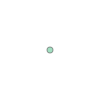

In [109]:
center_point

In [61]:
gdf['distance'] = gdf.distance(center_point)

In [64]:
# Set the CRS to WGS84 (EPSG:4326) before transforming
gdf.set_crs(epsg=4326, inplace=True)
gdf.to_crs(epsg=4326, inplace=True)

In [65]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [66]:
gdf['distance'] = gdf.distance(center_point)

In [68]:
# Find the nearest points
nearest_points = gdf.nsmallest(5, 'distance')  # Adjust the number of nearest points as needed

# Print the nearest points
print(nearest_points)

                       geometry  distance
50  POINT (172.58173 -43.50795)  0.003268
49  POINT (172.59317 -43.51432)  0.012990
39  POINT (172.59204 -43.52019)  0.016973
48  POINT (172.57694 -43.52398)  0.019808
64  POINT (172.59598 -43.52789)  0.025623


In [108]:
# plot the nearest_points on the gee map
import folium
import geemap
import ipywidgets as widgets

Map = geemap.Map(center=(lon,lat), zoom=12)
popup = widgets.HTML(value="Your Location")
Map.add_marker(location=(lon,lat), popup=popup, name="Current Location")
Map.add_gdf(nearest_points, "Nearest Hotspots")
Map



Map(center=[-43.5053818, 172.5837443], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [41]:
import ipywidgets as widgets

lon = -43.5053818
lat = 172.5837443
Map = geemap.Map(center=(lon,lat), zoom=10)
popup = widgets.HTML(value="You are here")
Map.add_marker(location=(lon,lat), popup=popup)
Map.add_marker(location=(-43.28178244, 172.5454009), popup=popup)

# Display the map
Map

Map(center=[-43.5053818, 172.5837443], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [4]:
import ee 


In [1]:
import geemap

In [18]:
%pip install geopy

# Use existing lat and lon variables

lat = 172.5837443
lon = -43.5053818
import folium
#from geopy.geocoders import Nominatim

# Get current location (replace with actual coordinates if needed)
#geolocator = Nominatim(user_agent="geo_locator")
# location = geolocator.geocode("Los Angeles, CA")
# lat, lon = location.latitude, location.longitude

# Create a map centered at the current location
m = folium.Map(location=[lon, lat], zoom_start=12)

folium.Marker(
    [lon, lat], 
    popup="Current Location", 
    icon=folium.Icon(color='red')  # Set marker color
).add_to(m)

# Add a marker


# Save map to an HTML file
#m.save("current_location.html")

# Display the map
m

Note: you may need to restart the kernel to use updated packages.


In [19]:
url = f"https://api.ebird.org/v2/ref/hotspot/geo?lat={lon}&lng={lat}"

payload = {}
headers = {
    'X-eBirdApiToken': 'aqf69iukjcqs'  # Replace 'YOUR_API_KEY' with your actual eBird API key
}

response = requests.request("GET", url, headers=headers, data=payload)

# Example data
data = response.text

In [110]:
endpoint = "https://en.wikipedia.org/w/api.php"

data = "common loon"
# Define the parameters
params = {
    "action": "query",
    "format": "json",
    "titles": f"{data}",
    # extract the taxonomy information  
    "prop": "categories|extracts",
    #"prop": "extracts",
    "exintro": True,
    "explaintext": True,
    #"pithumbsize": 500
    'cllimit': 100
}


# Make the request
response = requests.get(endpoint, params=params)

# Parse the response
data = response.json()

# Extract the page content
page = next(iter(data['query']['pages'].values()))

categories = [cat['title'] for cat in page.get('categories', [])]

categories



['Category:Articles containing video clips',
 "Category:Articles with 'species' microformats",
 'Category:Articles with hAudio microformats',
 'Category:Articles with short description',
 'Category:Birds described in 1764',
 'Category:Birds of Canada',
 'Category:Birds of Greenland',
 'Category:Birds of Iceland',
 'Category:CS1: abbreviated year range',
 'Category:CS1 Latin-language sources (la)',
 'Category:Commons category link is on Wikidata',
 'Category:Gaviiformes',
 'Category:Good articles',
 'Category:IUCN Red List least concern species',
 'Category:Native birds of Alaska',
 'Category:Native birds of the Northeastern United States',
 'Category:Native birds of the Northwestern United States',
 'Category:Short description is different from Wikidata',
 'Category:Taxa named by Morten Thrane Brünnich',
 'Category:Taxonbars with 35–39 taxon IDs',
 'Category:Use dmy dates from March 2018']

In [115]:
import requests

def convert_label(label):
    return label.replace(" ", "_").lower()

# Example label
label = "Common Loon"

# Define the endpoint
endpoint = "https://en.wikipedia.org/w/api.php"

# Define the parameters to get the categories
params = {
    "action": "query",
    "format": "json",
    "titles": f"{convert_label(label)}",
    "prop": "categories",
    "cllimit": 10  # Limit the number of categories to retrieve
}

# Make the request to get categories
response = requests.get(endpoint, params=params)

# Check if the response is empty
if response.text.strip() == "":
    print("Received empty response from Wikipedia API")
else:
    try:
        # Parse the response
        data = response.json()

        # Extract the categories
        page = next(iter(data['query']['pages'].values()))
        categories = [cat['title'] for cat in page.get('categories', [])]
        
        # Display the categories
        print(f"Categories: {', '.join(categories)}")

        # Use the first category to find related pages
        if categories:
            category = categories[4].replace("Category:", "")
            print(f"Searching for pages in category: {category}")

            # Define the parameters to get pages in the category
            params = {
                "action": "query",
                "format": "json",
                "list": "categorymembers",
                "cmtitle": f"Category:{category}",
                "cmlimit": 5  # Limit the number of pages to retrieve
            }

            # Make the request to get pages in the category
            response = requests.get(endpoint, params=params)
            data = response.json()

            # Extract the page titles
            pages = [page['title'] for page in data.get('query', {}).get('categorymembers', [])]
            print(f"Pages in category {category}: {', '.join(pages)}")

            # Extract content from the related pages
            for page_title in pages:
                params = {
                    "action": "query",
                    "format": "json",
                    "titles": page_title,
                    "prop": "extracts",
                    "exintro": True,
                    "explaintext": True
                }

                response = requests.get(endpoint, params=params)
                data = response.json()

                page = next(iter(data['query']['pages'].values()))
                extract = page.get('extract', 'No extract available')
                
                # Display the extract
                print(f"\n{page_title}")
                print(f"{extract}")

    except requests.exceptions.RequestException as e:
        print("Failed to retrieve data from Wikipedia API")
        print(f"Error: {e}")
    except ValueError as e:
        print("Failed to parse JSON response from Wikipedia API")
        print(f"Error: {e}")

Categories: Category:Articles containing video clips, Category:Articles with 'species' microformats, Category:Articles with hAudio microformats, Category:Articles with short description, Category:Birds described in 1764, Category:Birds of Canada, Category:Birds of Greenland, Category:Birds of Iceland, Category:CS1: abbreviated year range, Category:CS1 Latin-language sources (la)
Searching for pages in category: Birds described in 1764
Pages in category Birds described in 1764: American pygmy kingfisher, Barred antshrike, Citril finch, Common loon, Eastern subalpine warbler

American pygmy kingfisher
The American pygmy kingfisher (Chloroceryle aenea) is a species of "water kingfisher" in subfamily Cerylinae of family Alcedinidae. It is found in the American tropics from southern Mexico south through Central America into every mainland South American country except Chile and Uruguay. It also occurs on Trinidad.

Barred antshrike
The barred antshrike (Thamnophilus doliatus) is a passerine

In [54]:
#!pip install wikipedia-api
import wikipediaapi

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15382 sha256=3a1e9190ee7201be113f71ba5aa45cd3dce4f8de955db5d2d12a2790b6a19b26
  Stored in directory: /Users/michaeltang/Library/Caches/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api


In [103]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia(user_agent='MyProjectName (merlin@example.com)', language='en')

page_py = wiki_wiki.page('common loon')

#print("Page - Exists: %s" % page_py.exists())

# Get the summary of the page
#print(page_py.summary)

# Print the entire text of the page
print(page_py.text)



The common loon or great northern diver (Gavia immer) is a large member of the loon, or diver, family of birds. Breeding adults have a plumage that includes a broad black head and neck with a greenish, purplish, or bluish sheen, blackish or blackish-grey upperparts, and pure white underparts except some black on the undertail coverts and vent. Non-breeding adults are brownish with a dark neck and head marked with dark grey-brown. Their upperparts are dark brownish-grey with an unclear pattern of squares on the shoulders, and the underparts, lower face, chin, and throat are whitish. The sexes look alike, though males are significantly heavier than females. During the breeding season, loons live on lakes and other waterways in Canada, the northern United States (including Alaska), and southern parts of Greenland and Iceland. Small numbers breed on Svalbard and sporadically elsewhere in Arctic Eurasia. Common loons winter on both coasts of the US as far south as Mexico, and on the Atlanti

In [81]:
#print(page_py.summary)
# Extract the first secentence of the page_py.summary
summary = page_py.summary.split('\n')[0]

print(summary)

The common loon or great northern diver (Gavia immer) is a large member of the loon, or diver, family of birds. Breeding adults have a plumage that includes a broad black head and neck with a greenish, purplish, or bluish sheen, blackish or blackish-grey upperparts, and pure white underparts except some black on the undertail coverts and vent. Non-breeding adults are brownish with a dark neck and head marked with dark grey-brown. Their upperparts are dark brownish-grey with an unclear pattern of squares on the shoulders, and the underparts, lower face, chin, and throat are whitish. The sexes look alike, though males are significantly heavier than females. During the breeding season, loons live on lakes and other waterways in Canada, the northern United States (including Alaska), and southern parts of Greenland and Iceland. Small numbers breed on Svalbard and sporadically elsewhere in Arctic Eurasia. Common loons winter on both coasts of the US as far south as Mexico, and on the Atlanti

In [84]:
wiki_wiki = wikipediaapi.Wikipedia(
    user_agent='MyProjectName (merlin@example.com)',
    language='en',
    extract_format=wikipediaapi.ExtractFormat.WIKI
)

p_wiki = wiki_wiki.page("common loon")
print(p_wiki.text)
# Summary
# Section 1
# Text of section 1
# Section 1.1
# Text of section 1.1
# ...


wiki_html = wikipediaapi.Wikipedia(
    user_agent='MyProjectName (merlin@example.com)',
    language='en',
    extract_format=wikipediaapi.ExtractFormat.HTML
)
p_html = wiki_html.page("Test 1")
print(p_html.text)

The common loon or great northern diver (Gavia immer) is a large member of the loon, or diver, family of birds. Breeding adults have a plumage that includes a broad black head and neck with a greenish, purplish, or bluish sheen, blackish or blackish-grey upperparts, and pure white underparts except some black on the undertail coverts and vent. Non-breeding adults are brownish with a dark neck and head marked with dark grey-brown. Their upperparts are dark brownish-grey with an unclear pattern of squares on the shoulders, and the underparts, lower face, chin, and throat are whitish. The sexes look alike, though males are significantly heavier than females. During the breeding season, loons live on lakes and other waterways in Canada, the northern United States (including Alaska), and southern parts of Greenland and Iceland. Small numbers breed on Svalbard and sporadically elsewhere in Arctic Eurasia. Common loons winter on both coasts of the US as far south as Mexico, and on the Atlanti

In [85]:
def print_sections(sections, level=0):
    for s in sections:
        print("%s: %s - %s" % ("*" * (level + 1), s.title, s.text[0:40]))
        print_sections(s.sections, level + 1)

In [101]:
print_sections(p_wiki.sections)

*: Taxonomy - The common loon is also known as the gre
*: Description - The adult common loon can range from 66 
**: Moult - The scaly juvenile plumage is retained u
**: Genomics - With improved gene-sequencing technology
*: Distribution and habitat - Common loons are mainly Nearctic, and br
*: Behaviour - The common loon is an expert fisher, cat
**: Feeding - Fish account for about 80% of the diet o
**: Breeding - The common loon's mating system is seria
**: Habitat selection - Loons exhibit a strong tendency to settl
**: Vocalizations - The common loon produces a variety of vo
*: Longevity and terminal investment - Considerable information on longevity an
*: Predators and parasites - Adult common loons have few predators, a
*: Status and conservation - Since 1998, the common loon has been rat
**: Threats to status and conservation - 
***: Effects of mercury and acid rain pollution on health and brood productivity - The common loon is a key indicator of me
***: Mercury deposition in t

In [102]:
# Extract the contents of selected section
section = p_wiki.sections[0]
print(section.title)
print(section.text)


Taxonomy
The common loon is also known as the great northern diver in Eurasia. Another former name, great northern loon, was a compromise proposed by the International Ornithological Committee. It is one of five loon species that make up the genus Gavia, the only genus of the family Gaviidae and order Gaviiformes. Its closest relative is another large black-headed species, the yellow-billed loon or white-billed diver (Gavia adamsii). There are no recognized subspecies of the common loon.
Danish zoologist and mineralogist Morten Thrane Brünnich first described the common loon in 1764, as Colymbus immer in his Ornithologia Borealis. The now-defunct genus Colymbus contained grebes as well as loons, and remained in use until the International Commission on Zoological Nomenclature attempted to clarify the nomenclature in 1956 by declaring Colymbus a suppressed name unfit for further use and establishing Gavia, created by Johann Reinhold Forster in 1788, as the valid genus name for the loons